# Lab05: Neural Net

- Student ID: 18127212
- Student name: Nguyễn Chí Thành

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Implement a Neural Net model for classyfing images.
- Dataset: CIFAR-10. 
- Data description [here](https://www.cs.toronto.edu/~kriz/cifar.html). 
- Download `CIFAR-10 python version`, extract then copy folder `cifar-10-batches-py` to your notebook folder.

## Import

In [1]:
%matplotlib inline
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle

# ignore warning ...
import warnings
import math
warnings.filterwarnings('ignore')

## Define function
**Read CIFAR-10**

In [2]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding='bytes')
    return dict
def read_data(containing_dir, num_train_batchs):
    # Read training data
    train_X_batchs = []
    train_Y_batchs = []
    for batch_idx in range(num_train_batchs):
        
        batch = unpickle(containing_dir + '\\data_batch_' + str(batch_idx + 1))
        train_X_batchs.append(batch[b'data'])
        train_Y_batchs.append(np.array(batch[b'labels']).reshape(-1, 1))
    train_X = np.vstack(train_X_batchs)
    train_X = train_X / 255. # Normalize to [0, 1]
    train_X = np.hstack([np.ones((len(train_X), 1)), train_X])
    train_Y = np.vstack(train_Y_batchs)
    
    # Read test data
    batch = unpickle(containing_dir + '\\test_batch')
    test_X = batch[b'data']
    test_X = test_X / 255. # Normalize to [0, 1]
    test_X = np.hstack([np.ones((len(test_X), 1)), test_X])
    test_Y = np.array(batch[b'labels']).reshape(-1, 1)
    
    return (train_X, train_Y, test_X, test_Y)

**TODO:**

**Compute ouput**

we use sigmoid activation function at hidden layers, softmax at last layes.

In [3]:

def sigmoid(x):
    '''
    Computes sigmoid function for each element of array S.
    '''
    return 1 / (1 + np.exp(-x))



def gradient_sigmoid(As, Ws ,mb_X,delta, i):
    '''
    Computes gradient vector for sigmoid layer.
    '''
    return delta, grad


def softmax(S):
    '''
    Computes softmax function for each row of array S.
    '''
    A = np.exp(S)
    A /=A.sum(axis=1, keepdims=True)

    return A

def gradient_softmax(As,mb_X,mb_Y):
    '''
    Computes gradient vector for softmaz layer
    '''
    return delta, grad

def compute_nnet_outputs(Ws, X, need_all_layer_outputs):
    '''
    Computes the outputs of Neural Net by forward propagating X through the net.

    
    Parameters
    ----------
    Ws : list of numpy arrays
        Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
        W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
        d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
        d^(l) is the number of neurons (not count the +1 neuron) of layer l.
    X : numpy array, shape (N, d+1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    need_all_layer_outputs : bool
        If this var is true, we'll return a list of layer's-outputs; 
        otherwise, we'll return the final layer's output.
    
    Returns
    -------
    If `need_all_layer_outputs` is true, return
        A : numpy array, shape (N, K=10)
            The maxtrix of output vectors of final layer; each row is an output vector (containing 
            each class's probability given the corresponding input vector).
    Else, return
        As : list of numpy arrays
            As[l] is the matrix of output vectors of layer l; each row is an output vector (corresponding 
            to an input vector).
    '''    
    # TODO
    a1 = X
    z2 = a1.dot(Ws[0])
    a2 = sigmoid(z2)
    U1 = np.random.binomial(1, 0.5, size=a2.shape)
    a2 *= U1
    tmp  = np.ones((a2.shape[0], a2.shape[1]+1))
    tmp  = np.ones((a2.shape[0], a2.shape[1]+1))
    tmp[:, 1:] = a2
    a2 = tmp
    z3 = a2.dot(Ws[1])
    A = softmax(z3)
    As = [a2,A]
    if need_all_layer_outputs:
        return As
    else:
        return A

In [4]:

def compute_layer_sizes(X, Y, hid_layer_sizes):
    num_classes = len(np.unique(Y)) # Num classes
    layer_sizes = [X.shape[1] - 1] + hid_layer_sizes + [num_classes]
    print('Layer Sizes: ',layer_sizes)
    return layer_sizes


def one_hot_encoding(Y, num_classes):
    num_classes = len(np.unique(Y)) # Num classes
    one_hot_Y = np.zeros((len(Y), num_classes))
    one_hot_Y[np.arange(len(Y)), Y.reshape(-1)] = 1
    return one_hot_Y


def init_weight_matrix(X,Y,layer_sizes):
    #fix random for same result when init weight matrix
    np.random.seed(0) 
    Ws = np.array([np.random.randn(layer_sizes[i]+1 , layer_sizes[i + 1]) / np.sqrt(layer_sizes[i]+1) 
          for i in range(len(layer_sizes) - 1)]) # Init Ws
    print('Weight matrix shape: ',Ws[0].shape,Ws[1].shape)
    return Ws




**Training function**

In [8]:

def updateWeights(Ws,As,mb_X, mb_Y,  learning_rate):
    #update weights for softmax layer
    delta = As[-1] - mb_Y
    grad = (1.0/len(mb_X)) * (As[0].T.dot(delta))
    Ws[-1] -= learning_rate * grad
    #update weights for hidden layer
    for i in range(2,len(Ws) + 1):
        delta = delta.dot(Ws[-i + 1].T[:,1:]) * As[-i][:,1:] * (1 - As[-i][:,1:])
        grad = (1.0 / len(mb_X) ) * (mb_X.T.dot(delta))
        Ws[-i] -= learning_rate * grad
    return Ws

def train_nnet(X, Y, hid_layer_sizes, mb_size, learning_rate, max_epoch):
    '''
    Trains Neural Net on the dataset (X, Y).
    Cost function: mean negative log likelihood.
    Optimization algorithm: Stochastic Gradient Descent (SGD).
    
    Your code also needs to print out the cost and mean binary error on the training set after 
    each epoch (e.g., 'Epoch ..., cost ..., err ...%').
    
    Parameters
    ----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    hid_layer_sizes : list
        The list of hidden layer sizes; e.g., hid_layer_sizes = [20, 10] means: the Net has 2 hidden 
        layers, the 1st one has 20 neurons, and the 2nd one has 10 neurons (not count the +1 neurons).
    mb_size : int
        Minibatch size of SGD.
    learning_rate : float
        Learning rate of SGD.
    max_epoch : int
        After this number of epochs, we'll terminate SGD.

    Returns
    -------
    (Ws, costs, errs) : tuple
        Ws : list of numpy arrays
            Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
            W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
            d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
            d^(l) is the number of neurons (not count the +1 neuron) of layer l.
        costs : list, len = max_epoch
            The list of costs after each epoch.
        errs : list, len = max_epoch
            The list of mean binary errors (on the training set) after each epoch.
    '''
    
    #get layer sizes:
    layer_sizes = compute_layer_sizes(X, Y, hid_layer_sizes)

    
    # Prepare for training
    Ws=init_weight_matrix(X,Y,layer_sizes)
    one_hot_Y=one_hot_encoding(Y,layer_sizes[-1])
    
    costs = [] # To save costs during training
    errs = [] # To save mean binary errors during training
    N = len(X) # Num training examples
    rnd_idxs = list(range(N)) # Random indexes    
    
    # Train
    for epoch in list(range(max_epoch)):
        #shuffle index
        np.random.shuffle(rnd_idxs)
        for start_idx in list(range(0, N, mb_size)):
            # Get minibach
            mb_X = X[rnd_idxs[start_idx:start_idx+mb_size]]
            mb_Y = one_hot_Y[rnd_idxs[start_idx:start_idx+mb_size]]
            
            # Forward-prop
            As = compute_nnet_outputs(Ws, mb_X, True)
            
            # Back-prop; on the way, compute each layer's gradient and update its W
            Ws=updateWeights(Ws,As,mb_X,mb_Y,learning_rate)   

        
        # Compute training info, save it, and print it
        A = compute_nnet_outputs(Ws, X, False)
        cost = np.mean(-np.sum(one_hot_Y * np.log(A), axis=1))
        err = np.mean(np.argmax(A, axis=1) != Y.squeeze()) * 100
        costs.append(cost)
        errs.append(err)
        print ('Epoch %d, cost %.3f, err %.3f%%' %(epoch, cost, err))
            
    return Ws, costs, errs

## Running

**1.** Read data (placed `cifar-10-batches-py` into same folder with this notebook)

In [9]:
num_train_batchs = 3 
train_X, train_Y, test_X, test_Y = read_data('cifar-10-batches-py', num_train_batchs)
print ('train_X.shape = %s, train_Y.shape = %s' %(train_X.shape, train_Y.shape))
print ('test_X.shape  = %s, test_Y.shape  = %s' %(test_X.shape, test_Y.shape))

train_X.shape = (30000, 3073), train_Y.shape = (30000, 1)
test_X.shape  = (10000, 3073), test_Y.shape  = (10000, 1)


**2.** To observe affect of the number of neurons of hidden layer, we will train our nnet with repectively `hid_layer_sizes = [50]`, `[100]`, và `[200]` (cố định `mb_size = 32`, `learning_rate = 0.01`, `max_epoch = 200`)

In [10]:
W_0, costs_0, errs_0 = train_nnet(train_X, train_Y, [50], 32, 0.01, 200)

Layer Sizes:  [3072, 50, 10]
Weight matrix shape:  (3073, 50) (51, 10)
Epoch 0, cost 2.235, err 82.480%
Epoch 1, cost 2.173, err 79.527%
Epoch 2, cost 2.120, err 77.330%
Epoch 3, cost 2.083, err 75.810%
Epoch 4, cost 2.056, err 74.993%
Epoch 5, cost 2.028, err 73.430%
Epoch 6, cost 2.008, err 72.680%
Epoch 7, cost 1.995, err 72.030%
Epoch 8, cost 1.979, err 71.647%
Epoch 9, cost 1.964, err 70.983%
Epoch 10, cost 1.959, err 70.687%
Epoch 11, cost 1.950, err 70.187%
Epoch 12, cost 1.938, err 69.813%
Epoch 13, cost 1.934, err 69.527%
Epoch 14, cost 1.921, err 69.097%
Epoch 15, cost 1.920, err 69.307%
Epoch 16, cost 1.914, err 68.430%
Epoch 17, cost 1.906, err 68.147%
Epoch 18, cost 1.902, err 67.923%
Epoch 19, cost 1.894, err 67.947%
Epoch 20, cost 1.890, err 67.627%
Epoch 21, cost 1.888, err 67.610%
Epoch 22, cost 1.878, err 67.077%
Epoch 23, cost 1.879, err 67.087%
Epoch 24, cost 1.878, err 66.877%
Epoch 25, cost 1.871, err 66.710%
Epoch 26, cost 1.868, err 67.060%
Epoch 27, cost 1.862,

In [11]:
W_1, costs_1, errs_1 = train_nnet(train_X, train_Y, [100], 32, 0.01, 200)

Layer Sizes:  [3072, 100, 10]
Weight matrix shape:  (3073, 100) (101, 10)
Epoch 0, cost 2.232, err 82.073%
Epoch 1, cost 2.154, err 79.093%
Epoch 2, cost 2.099, err 76.533%
Epoch 3, cost 2.056, err 74.633%
Epoch 4, cost 2.026, err 73.610%
Epoch 5, cost 2.002, err 72.377%
Epoch 6, cost 1.983, err 71.480%
Epoch 7, cost 1.968, err 70.930%
Epoch 8, cost 1.952, err 70.430%
Epoch 9, cost 1.944, err 69.643%
Epoch 10, cost 1.928, err 69.120%
Epoch 11, cost 1.921, err 68.533%
Epoch 12, cost 1.912, err 68.110%
Epoch 13, cost 1.908, err 68.390%
Epoch 14, cost 1.898, err 67.837%
Epoch 15, cost 1.892, err 67.820%
Epoch 16, cost 1.885, err 67.173%
Epoch 17, cost 1.877, err 66.867%
Epoch 18, cost 1.873, err 66.710%
Epoch 19, cost 1.867, err 66.400%
Epoch 20, cost 1.860, err 66.160%
Epoch 21, cost 1.854, err 66.077%
Epoch 22, cost 1.851, err 66.010%
Epoch 23, cost 1.848, err 65.627%
Epoch 24, cost 1.843, err 65.657%
Epoch 25, cost 1.837, err 65.563%
Epoch 26, cost 1.833, err 65.090%
Epoch 27, cost 1.8

In [12]:
W_2, costs_2, errs_2 = train_nnet(train_X, train_Y, [200], 32, 0.01, 200)

Layer Sizes:  [3072, 200, 10]
Weight matrix shape:  (3073, 200) (201, 10)
Epoch 0, cost 2.221, err 81.580%
Epoch 1, cost 2.135, err 77.773%
Epoch 2, cost 2.076, err 75.210%
Epoch 3, cost 2.031, err 73.500%
Epoch 4, cost 2.001, err 72.233%
Epoch 5, cost 1.979, err 70.870%
Epoch 6, cost 1.958, err 70.433%
Epoch 7, cost 1.945, err 69.660%
Epoch 8, cost 1.932, err 69.293%
Epoch 9, cost 1.921, err 68.520%
Epoch 10, cost 1.911, err 68.547%
Epoch 11, cost 1.905, err 67.757%
Epoch 12, cost 1.892, err 67.353%
Epoch 13, cost 1.885, err 67.333%
Epoch 14, cost 1.877, err 67.027%
Epoch 15, cost 1.873, err 66.577%
Epoch 16, cost 1.865, err 65.960%
Epoch 17, cost 1.862, err 66.130%
Epoch 18, cost 1.855, err 65.980%
Epoch 19, cost 1.849, err 65.787%
Epoch 20, cost 1.843, err 65.480%
Epoch 21, cost 1.835, err 65.183%
Epoch 22, cost 1.831, err 64.857%
Epoch 23, cost 1.825, err 64.750%
Epoch 24, cost 1.823, err 64.653%
Epoch 25, cost 1.818, err 64.383%
Epoch 26, cost 1.810, err 64.113%
Epoch 27, cost 1.8

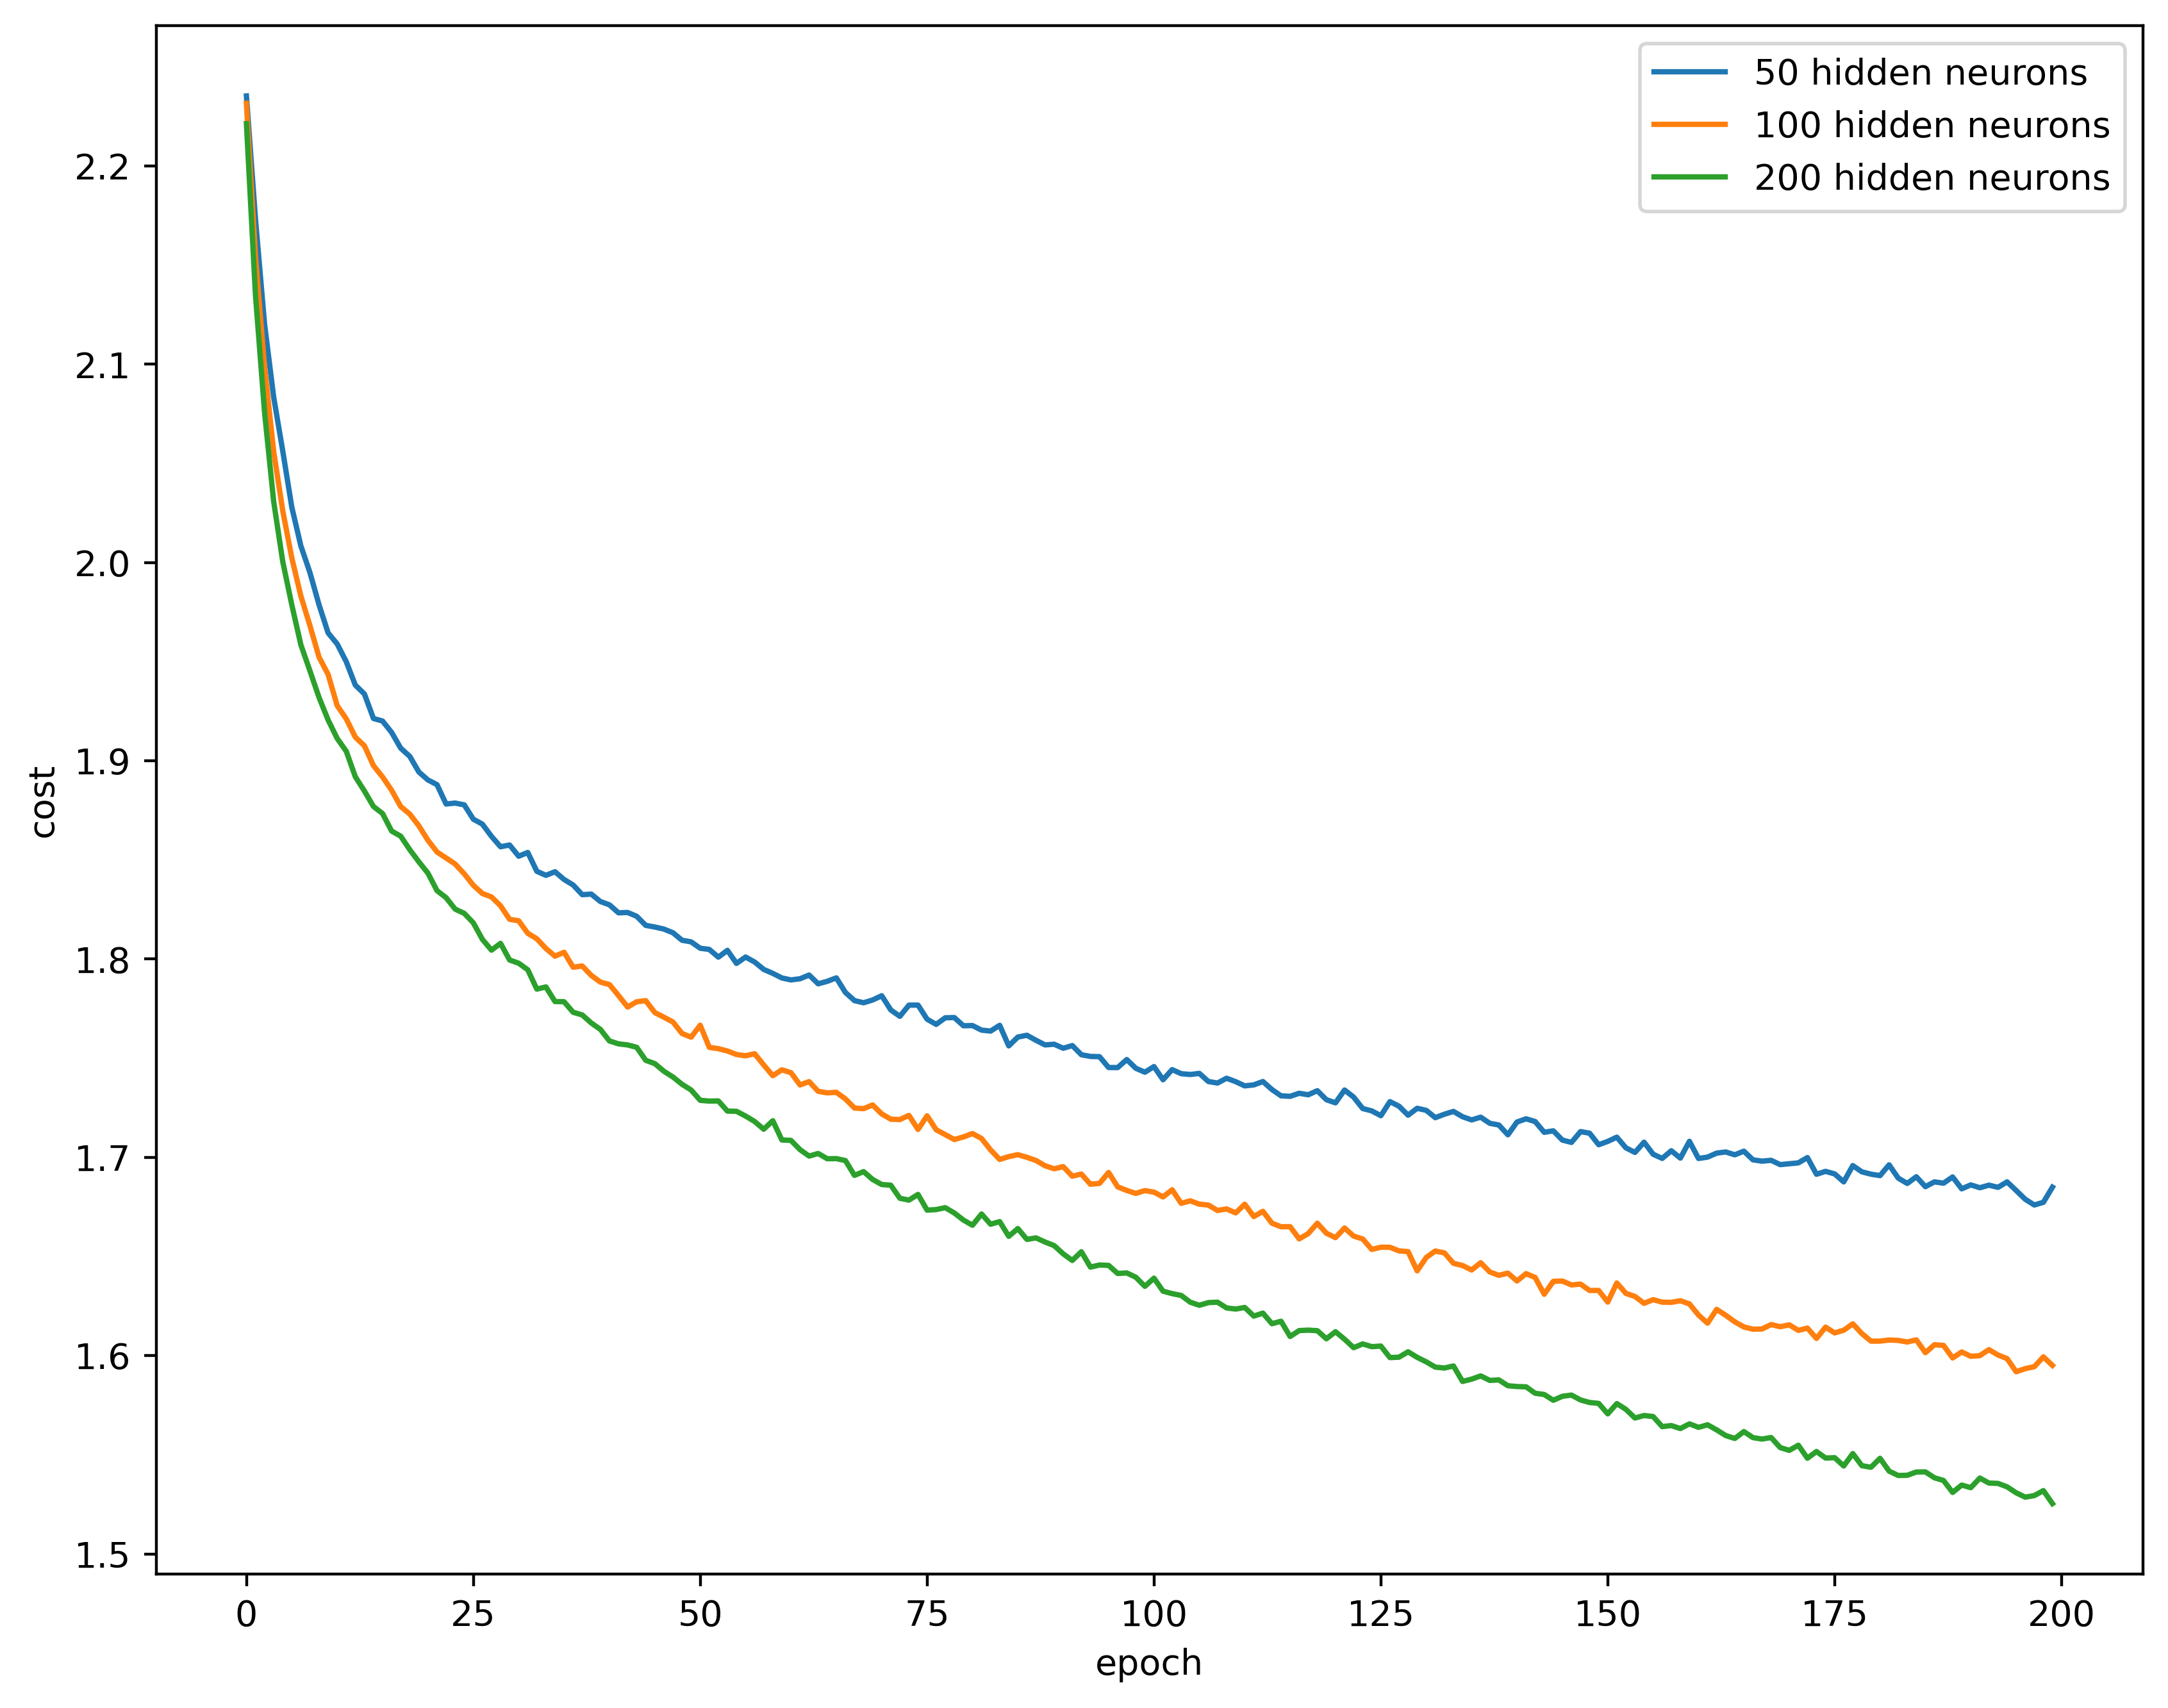

In [14]:
# Visualize results
epochs = np.arange(len(costs_0))
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, costs_0, label='50 hidden neurons')
plt.plot(epochs, costs_1, label='100 hidden neurons')
plt.plot(epochs, costs_2, label='200 hidden neurons')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(loc='best')
plt.savefig('figure_1.png')

**TODO**: Evaluate your model

*The model doesn have high accuracy. The more hidden neuron, the less model cost.